In [1]:
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [7]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [8]:
#making dictionary of models
models = {
    'SVR':SVR(),
    'XGBRegressor':XGBRegressor(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [9]:
from dataprocessing import *
from sklearn.metrics import mean_squared_error
#taking results from the models
model_results = []
model_names = []

# training the model with function
for name,model in models.items():
    a = model.fit(X_vtrain,y_BindingEnergy_vtrain)
    predicted = a.predict(X_test)
    score = np.sqrt(mean_squared_error(y_BindingEnergy_test, predicted))
    model_results.append(score)
    model_names.append(name)
    print(f'{name} : {score}')

SVR : 0.9513120707721119
XGBRegressor : 1.585682585137555
Ridge : 1.0442038345281301
ElasticNet : 0.9525645125782001
SGDRegressor : 3257145533582.1523
BayesianRidge : 1.049667511742051
LinearRegression : 1.0842580937545587
RandomForestRegressor : 1.2254317204654184


In [10]:
df_results = pd.DataFrame([model_names,model_results])
df_results = df_results.transpose()
df_results = df_results.rename(columns={0:'Model',1:'RMSE'}).sort_values(by='RMSE',ascending=False)
df_results

,Model,RMSE
4,SGDRegressor,3257145533582.152344
1,XGBRegressor,1.585683
7,RandomForestRegressor,1.225432
6,LinearRegression,1.084258
5,BayesianRidge,1.049668
2,Ridge,1.044204
3,ElasticNet,0.952565
0,SVR,0.951312


In [18]:
import pandas as pd
from sklearn.utils import shuffle
seed = 7
file_path = r'D:\Programming\algorithm\AI\mlchem\data.xlsx'
df = pd.read_excel(file_path)
df = df.set_index("Unnamed: 0")
df.index_name = "function_groups"

In [19]:
df

,y1,y2,y3,x1,x2,x3,x6,x7,x10,x11,x12,x13
Unnamed: 0,,,,,,,,,,,,
无取代,-20.014369,32.347074,-2.257153,1.34299,0.04913,-0.33067,126.832572,-0.32826,0.390000,-0.305000,0.42700,-0.36900
p-F,-20.108872,32.188125,-4.040537,1.34263,0.03662,-0.32980,128.984053,-0.33784,0.388000,-0.303000,0.41100,-0.36700
p-COH,-21.079630,32.784260,-1.914533,1.34376,0.05125,-0.31824,127.039399,-0.32557,0.388000,-0.306000,0.42100,-0.37100
p-COMe,-21.188189,32.564631,-1.865587,1.34355,0.05019,-0.31977,127.014927,-0.32615,0.389000,-0.306000,0.42200,-0.37000
p-CN,-21.709650,29.184235,-2.956827,1.33648,0.00701,-0.34663,126.735685,-0.35193,0.408000,-0.290000,0.45400,-0.35600
p-CF3,-21.395895,30.172563,-2.899724,1.33869,0.02973,-0.35163,126.827929,-0.34672,0.403000,-0.295000,0.44700,-0.36000
p-NO2,-22.731236,29.058106,-2.309864,1.33497,-0.03099,-0.36007,126.887542,-0.35608,0.417000,-0.287000,0.45900,-0.35400
p-Me,-20.841176,33.337096,-2.026857,1.34402,0.05022,-0.31879,126.958451,-0.32672,0.384000,-0.306000,0.41900,-0.37100
p-iPr,-21.792481,33.990334,-1.096260,1.34380,0.05007,-0.31884,127.006769,-0.32625,0.385000,-0.306000,0.42000,-0.37100


In [24]:
df.drop(["o-NO2 ", "o-COMe"])

,y1,y2,y3,x1,x2,x3,x6,x7,x10,x11,x12,x13
Unnamed: 0,,,,,,,,,,,,
无取代,-20.014369,32.347074,-2.257153,1.34299,0.04913,-0.33067,126.832572,-0.32826,0.390000,-0.305000,0.42700,-0.36900
p-F,-20.108872,32.188125,-4.040537,1.34263,0.03662,-0.32980,128.984053,-0.33784,0.388000,-0.303000,0.41100,-0.36700
p-COH,-21.079630,32.784260,-1.914533,1.34376,0.05125,-0.31824,127.039399,-0.32557,0.388000,-0.306000,0.42100,-0.37100
p-COMe,-21.188189,32.564631,-1.865587,1.34355,0.05019,-0.31977,127.014927,-0.32615,0.389000,-0.306000,0.42200,-0.37000
p-CN,-21.709650,29.184235,-2.956827,1.33648,0.00701,-0.34663,126.735685,-0.35193,0.408000,-0.290000,0.45400,-0.35600
p-CF3,-21.395895,30.172563,-2.899724,1.33869,0.02973,-0.35163,126.827929,-0.34672,0.403000,-0.295000,0.44700,-0.36000
p-NO2,-22.731236,29.058106,-2.309864,1.33497,-0.03099,-0.36007,126.887542,-0.35608,0.417000,-0.287000,0.45900,-0.35400
p-Me,-20.841176,33.337096,-2.026857,1.34402,0.05022,-0.31879,126.958451,-0.32672,0.384000,-0.306000,0.41900,-0.37100
p-iPr,-21.792481,33.990334,-1.096260,1.34380,0.05007,-0.31884,127.006769,-0.32625,0.385000,-0.306000,0.42000,-0.37100


In [17]:
df.drop(df.rows(['33']), axis = 0)

AttributeError: 'DataFrame' object has no attribute 'rows'

In [11]:
df

,y1,y2,y3,x1,x2,x3,x6,x7,x10,x11,x12,x13
Unnamed: 0,,,,,,,,,,,,
无取代,-20.014369,32.347074,-2.257153,1.34299,0.04913,-0.33067,126.832572,-0.32826,0.390000,-0.305000,0.42700,-0.36900
p-F,-20.108872,32.188125,-4.040537,1.34263,0.03662,-0.32980,128.984053,-0.33784,0.388000,-0.303000,0.41100,-0.36700
p-COH,-21.079630,32.784260,-1.914533,1.34376,0.05125,-0.31824,127.039399,-0.32557,0.388000,-0.306000,0.42100,-0.37100
p-COMe,-21.188189,32.564631,-1.865587,1.34355,0.05019,-0.31977,127.014927,-0.32615,0.389000,-0.306000,0.42200,-0.37000
p-CN,-21.709650,29.184235,-2.956827,1.33648,0.00701,-0.34663,126.735685,-0.35193,0.408000,-0.290000,0.45400,-0.35600
p-CF3,-21.395895,30.172563,-2.899724,1.33869,0.02973,-0.35163,126.827929,-0.34672,0.403000,-0.295000,0.44700,-0.36000
p-NO2,-22.731236,29.058106,-2.309864,1.33497,-0.03099,-0.36007,126.887542,-0.35608,0.417000,-0.287000,0.45900,-0.35400
p-Me,-20.841176,33.337096,-2.026857,1.34402,0.05022,-0.31879,126.958451,-0.32672,0.384000,-0.306000,0.41900,-0.37100
p-iPr,-21.792481,33.990334,-1.096260,1.34380,0.05007,-0.31884,127.006769,-0.32625,0.385000,-0.306000,0.42000,-0.37100


In [1]:
from function import fake_data
import pandas as pd
from sklearn.utils import shuffle
seed = 7
file_path = r'D:\Programming\algorithm\AI\mlchem\data.xlsx'
df = pd.read_excel(file_path)
df = df.set_index("Unnamed: 0")
df.index_name = "function_groups"
df = df.drop(["o-NO2 ", "o-COMe"])
# 切分训练集、验证集、测试集
df_vtrain = df.sample(frac = 0.9)
# fake_vtrain = shuffle(fake_data(df_vtrain, 0.1, 1))
fake_vtrain = shuffle(df_vtrain)
X_Mulliken_vtrain = fake_vtrain.loc[:, ['x1', 'x2', 'x3', 'x6', 'x7', 'x10', 'x11']].values
X_NBO_vtrain = fake_vtrain.loc[:, ['x1', 'x2', 'x3', 'x6', 'x7', 'x12', 'x13']].values
X_vtrain = fake_vtrain.loc[:, ['x1', 'x2', 'x3', 'x6', 'x7', 'x10', 'x11', 'x12', 'x13']].values
y_BindingEnergy_vtrain = fake_vtrain.loc[:, ['y1']].values.flatten()
y_ActivationEnergy_vtrain = fake_vtrain.loc[:, ['y2']].values.flatten()
y_Q_vtrain = fake_vtrain.loc[:, ['y3']].values.flatten()

# test dataset
df_test=df[~df.index.isin(df_vtrain.index)]
X_Mulliken_test = df_test.loc[:, ['x1', 'x2', 'x3', 'x6', 'x7', 'x10', 'x11']].values
X_NBO_test = df_test.loc[:, ['x1', 'x2', 'x3', 'x6', 'x7', 'x12', 'x13']].values
X_test = df_test.loc[:, ['x1', 'x2', 'x3', 'x6', 'x7', 'x10', 'x11', 'x12', 'x13']].values
y_BindingEnergy_test = df_test.loc[:, ['y1']].values.flatten()
y_ActivationEnergy_test = df_test.loc[:, ['y2']].values.flatten()
y_Q_test = df_test.loc[:, ['y3']].values.flatten()

In [2]:
X_vtrain

array([[ 1.33765000e+00,  2.26900000e-02, -3.48350000e-01,
         1.30029485e+02, -3.50320000e-01,  3.79000000e-01,
        -2.80000000e-01,  4.58000000e-01, -3.53000000e-01],
       [ 1.33706000e+00, -3.55300000e-02, -3.56710000e-01,
         1.26159160e+02, -3.53200000e-01,  3.16735000e-01,
        -2.36203000e-01,  4.35870000e-01, -3.56230000e-01],
       [ 1.34149000e+00,  5.33500000e-02, -3.12180000e-01,
         1.26858771e+02, -3.08900000e-01,  3.15687000e-01,
        -2.50507000e-01,  4.50530000e-01, -3.66940000e-01],
       [ 1.33776000e+00, -1.29000000e-03, -3.51310000e-01,
         1.26168070e+02, -3.51270000e-01,  3.20722000e-01,
        -2.41884000e-01,  4.32730000e-01, -3.57580000e-01],
       [ 1.34333000e+00, -3.60000000e-04, -3.13470000e-01,
         1.26257798e+02, -3.19300000e-01,  3.08508000e-01,
        -2.61381000e-01,  4.54910000e-01, -3.65650000e-01],
       [ 1.34349000e+00,  5.41700000e-02, -3.21830000e-01,
         1.27045028e+02, -3.21380000e-01,  3.315610

In [4]:
y_BindingEnergy_vtrain, y_BindingEnergy_test

(array([-21.29674813, -21.95099006, -21.15409001, -21.42570144,
        -23.27609038, -20.80708326, -20.45964979, -20.0143687 ,
        -21.07962967, -20.1088717 , -21.92927821, -21.79248104,
        -23.39388655, -20.8036445 , -20.74391182, -21.39589472,
        -21.18818891, -23.20621086, -20.93308726, -21.8972752 ,
        -21.77051819, -20.11326428, -21.43334451, -21.07962967,
        -20.8034688 , -23.38168149, -20.54875622, -19.51748118,
        -20.84117587, -21.46419918, -22.731236  , -20.69747608,
        -20.18417291, -21.95245843, -20.90690755, -21.18818891,
        -20.4351769 , -20.89867462, -21.70964972, -23.01252363,
        -20.40505643, -20.6673556 , -21.90375111]),
 array([-19.97329817, -21.63945017, -20.35297309, -20.44898212,
        -23.59553062]))

In [5]:
y_Q_test

array([-3.84073771, -2.19210578, -8.95519521, -5.09914626,  0.17590988])

In [2]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
file_path = r'D:\Programming\algorithm\AI\mlchem\data.xlsx'
df = pd.read_excel(file_path)
df = df.set_index("Unnamed: 0")
df.index_name = "function_groups"
df_vtrain = df.sample(frac = 0.8)
df.columns = ['Binding Energy', 'Activation Energy', 'Heat of Reaction', 'C-F Bond Length', 'LUMO of Equilibrium Structure', 'HOMO of Equilibrium Structure', 'C-F Bond Energy','b-SOMO', 'C1-Mulliken', 'F-Mulliken', 'C1-NBO', 'F-NBO']
df.index.name = "function groups/parameters"

In [4]:
df.to_csv("test.txt", sep = "\t", index = False)

In [5]:
df.to_csv("data.csv",encoding = "gbk")

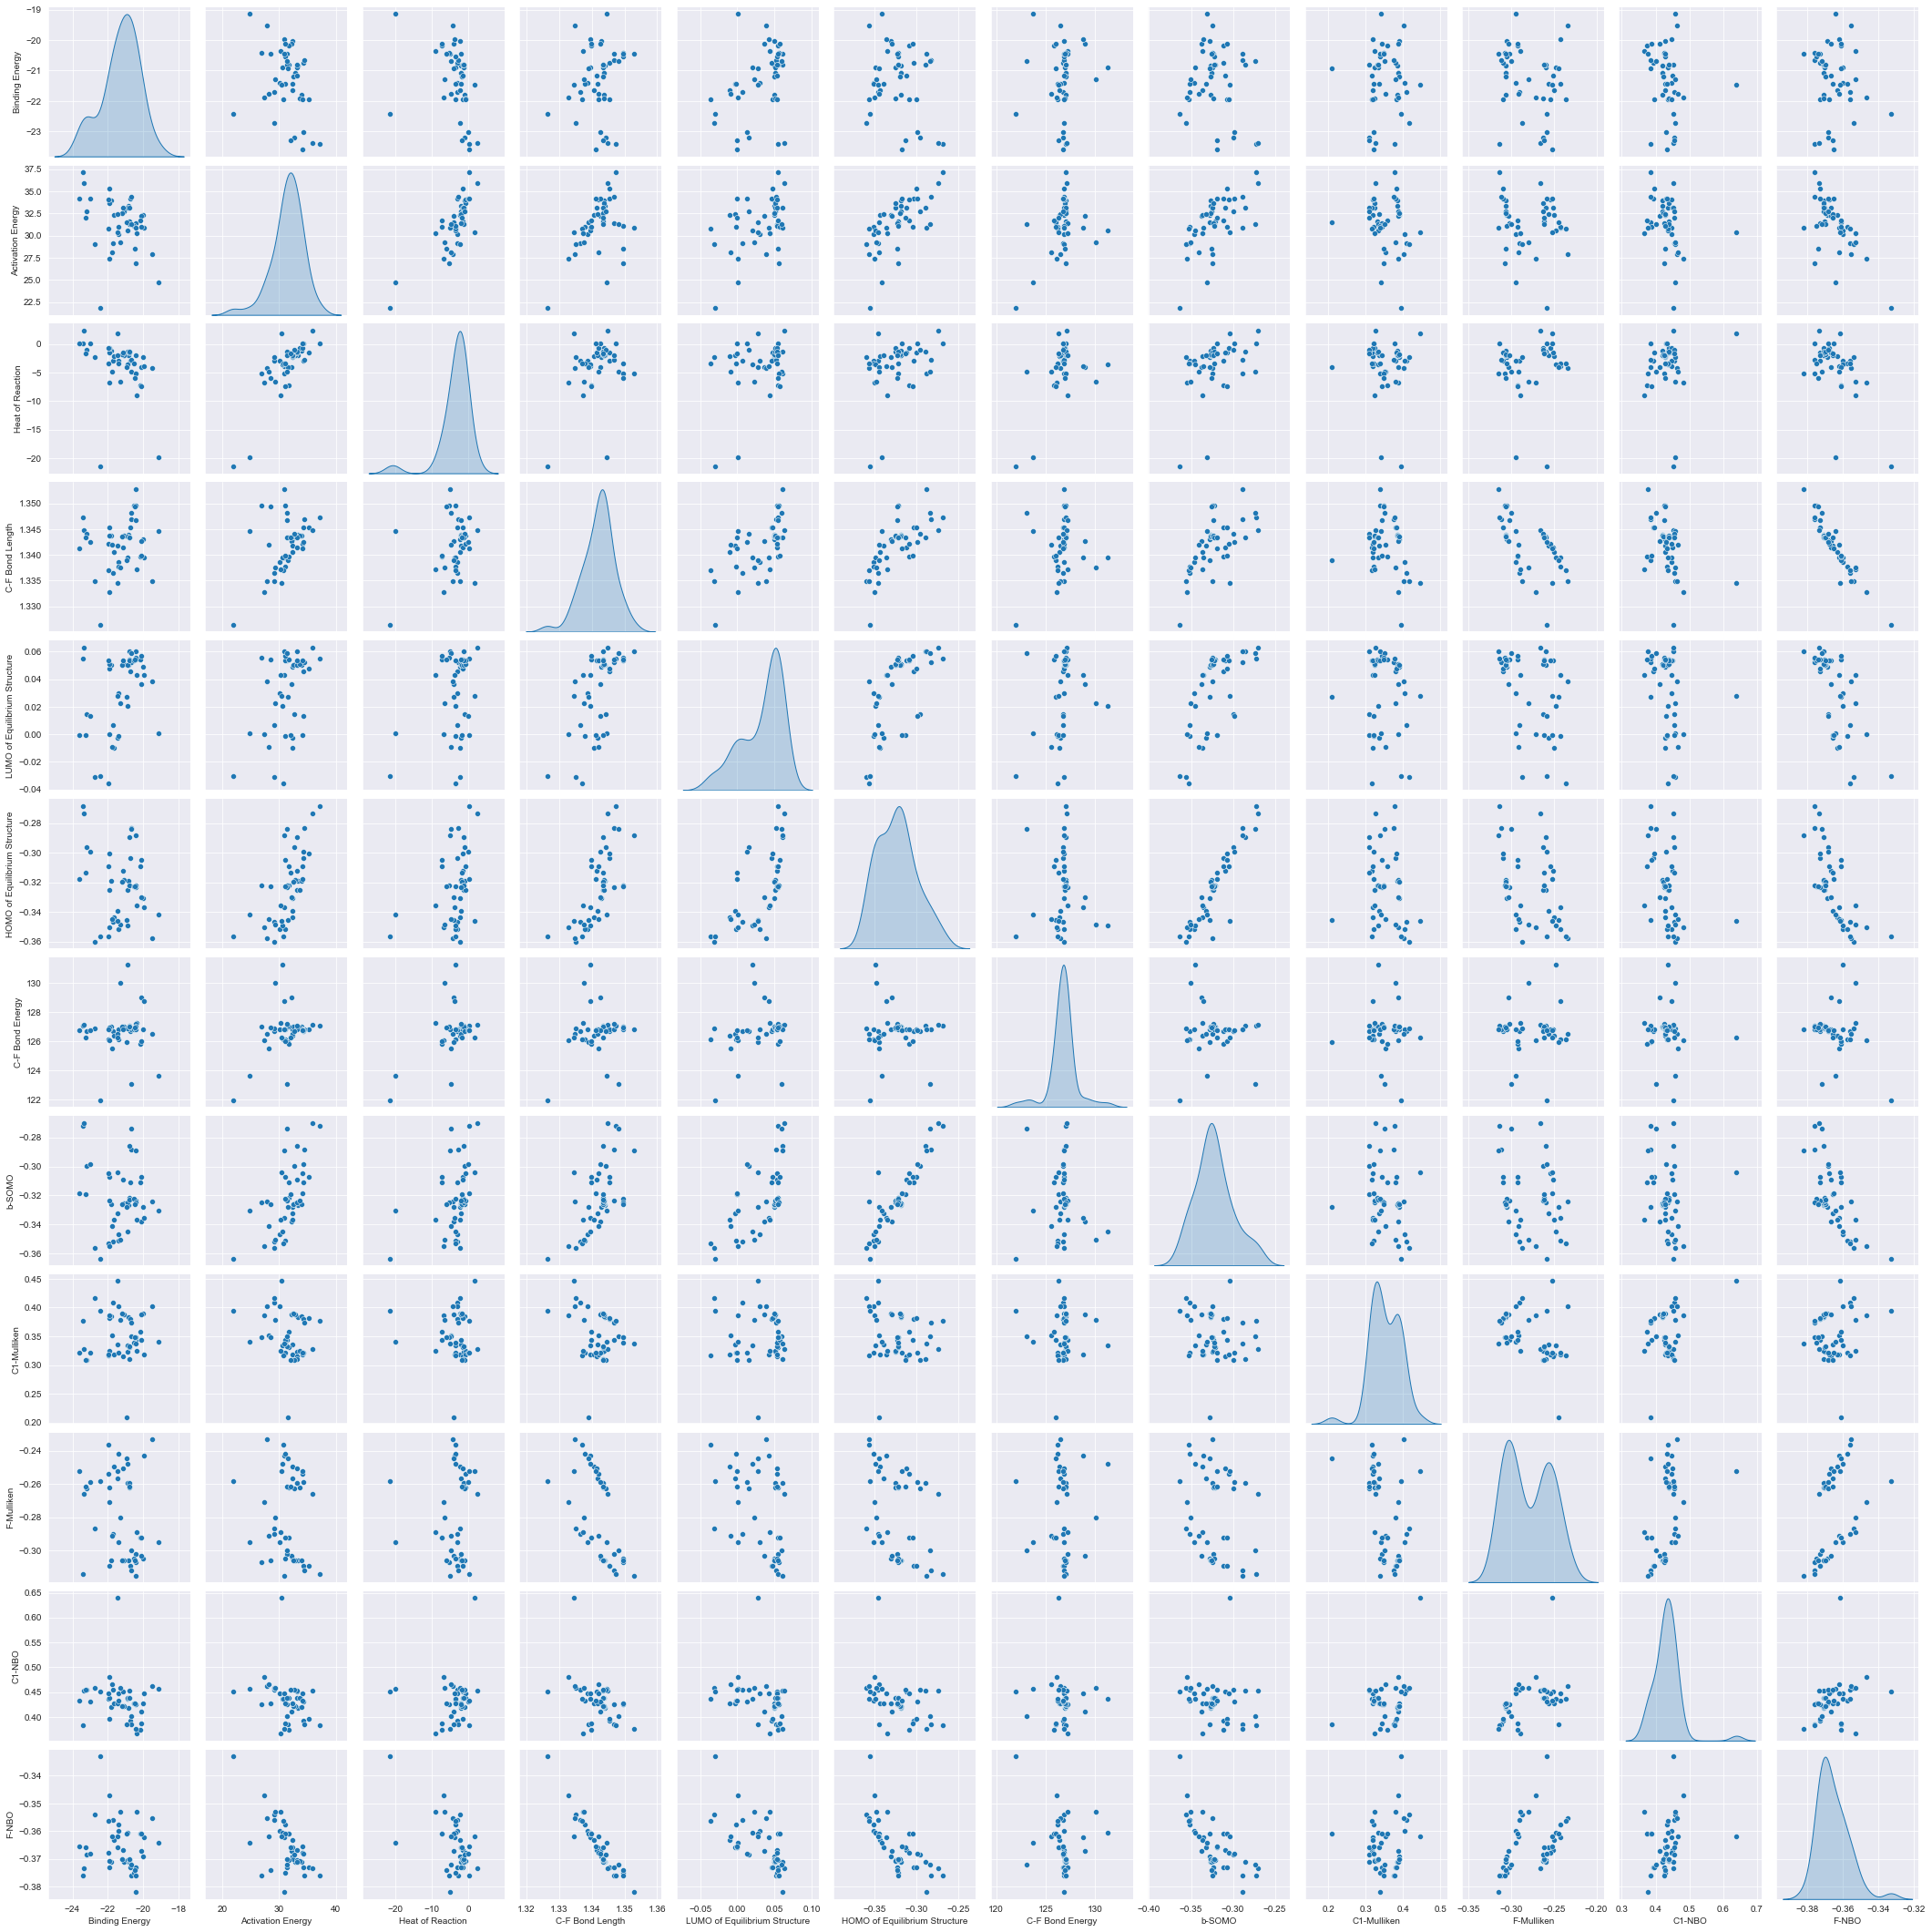

In [16]:
mydata = df.copy()
sns.pairplot(mydata, diag_kind = "kde")
#plt.savefig("distribution.svg")
plt.savefig("distribution.svg")
plt.show()

c:\python39\lib\site-packages\seaborn-0.11.1-py3.9.egg\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


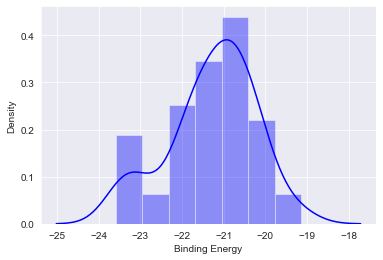

Distribution of  Binding Energy
Mean is: -21.28118036503024
Median is: -21.11685984328005
Mode is: 0    -23.595531
1    -23.393887
2    -23.381681
3    -23.276090
4    -23.206211
5    -23.012524
6    -22.731236
7    -22.409951
8    -21.952458
9    -21.950990
10   -21.929278
11   -21.903751
12   -21.897275
13   -21.792481
14   -21.770518
15   -21.709650
16   -21.639450
17   -21.464199
18   -21.433345
19   -21.425701
20   -21.395895
21   -21.296748
22   -21.188189
23   -21.188189
24   -21.154090
25   -21.079630
26   -21.079630
27   -20.933087
28   -20.906908
29   -20.898675
30   -20.841176
31   -20.807083
32   -20.803645
33   -20.803469
34   -20.743912
35   -20.697476
36   -20.667356
37   -20.548756
38   -20.459650
39   -20.448982
40   -20.435177
41   -20.405056
42   -20.352973
43   -20.184173
44   -20.113264
45   -20.108872
46   -20.014369
47   -19.973298
48   -19.517481
49   -19.135604
dtype: float64
Standard deviation is: 1.039082104835907
Skewness is: -0.5430513097294266
Maximum is: 

c:\python39\lib\site-packages\seaborn-0.11.1-py3.9.egg\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


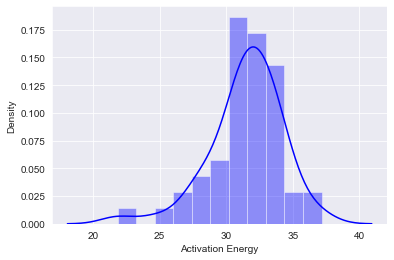

Distribution of  Activation Energy
Mean is: 31.472223764085214
Median is: 31.66938176001848
Mode is: 0    32.564631
dtype: float64
Standard deviation is: 2.747875482146594
Skewness is: -1.0487725620208936
Maximum is: 37.1523570599396
Minimum is: 21.8392305300068


c:\python39\lib\site-packages\seaborn-0.11.1-py3.9.egg\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


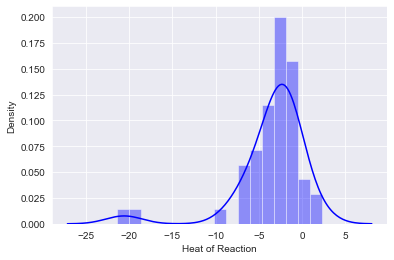

Distribution of  Heat of Reaction
Mean is: -3.500937526965241
Median is: -2.283508889977535
Mode is: 0    -21.413779
1    -19.799823
2     -8.955195
3     -7.324924
4     -7.148594
5     -6.688629
6     -6.573167
7     -5.966993
8     -5.221511
9     -5.099146
10    -4.839985
11    -4.814257
12    -4.143700
13    -4.040537
14    -4.040267
15    -3.840738
16    -3.608170
17    -3.474372
18    -3.442520
19    -3.422753
20    -2.956827
21    -2.921059
22    -2.899724
23    -2.799950
24    -2.309864
25    -2.257153
26    -2.192106
27    -2.033302
28    -2.027485
29    -2.026857
30    -1.914533
31    -1.914533
32    -1.865587
33    -1.865587
34    -1.703050
35    -1.571913
36    -1.495626
37    -1.446818
38    -1.395300
39    -1.296122
40    -1.255811
41    -1.096260
42    -0.985109
43    -0.719365
44    -0.711050
45     0.022164
46     0.129895
47     0.175910
48     1.806746
49     2.338460
dtype: float64
Standard deviation is: 4.193380544290888
Skewness is: -2.818948523028756
Maximum is:

c:\python39\lib\site-packages\seaborn-0.11.1-py3.9.egg\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


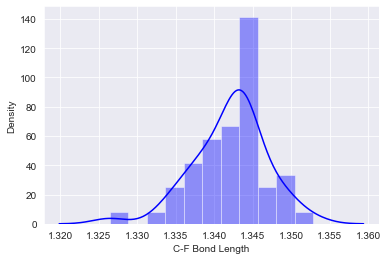

Distribution of  C-F Bond Length
Mean is: 1.342047
Median is: 1.34316
Mode is: 0    1.34341
1    1.34355
2    1.34376
dtype: float64
Standard deviation is: 0.004782290993117963
Skewness is: -0.6115242447197597
Maximum is: 1.35283
Minimum is: 1.3264


c:\python39\lib\site-packages\seaborn-0.11.1-py3.9.egg\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


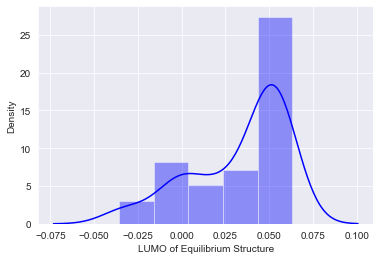

Distribution of  LUMO of Equilibrium Structure
Mean is: 0.0328868
Median is: 0.04838
Mode is: 0    0.05019
1    0.05125
dtype: float64
Standard deviation is: 0.027424791662185616
Skewness is: -1.021851984571604
Maximum is: 0.06306
Minimum is: -0.03553


c:\python39\lib\site-packages\seaborn-0.11.1-py3.9.egg\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


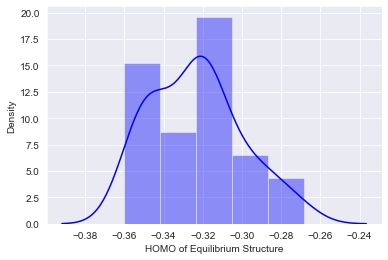

Distribution of  HOMO of Equilibrium Structure
Mean is: -0.3234012
Median is: -0.32233999999999996
Mode is: 0   -0.31977
1   -0.31824
dtype: float64
Standard deviation is: 0.023149470892706057
Skewness is: 0.42586042060851687
Maximum is: -0.2683
Minimum is: -0.36007


c:\python39\lib\site-packages\seaborn-0.11.1-py3.9.egg\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


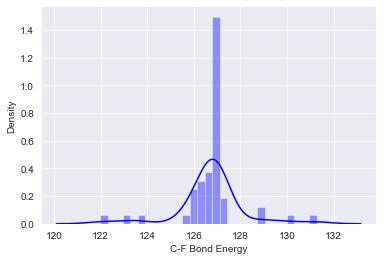

Distribution of  C-F Bond Energy
Mean is: 126.73311876987538
Median is: 126.8505032999795
Mode is: 0     121.979159
1     123.117462
2     123.676573
3     125.540278
4     125.850896
5     125.974044
6     125.997105
7     126.111940
8     126.159160
9     126.168070
10    126.257798
11    126.289613
12    126.409894
13    126.490786
14    126.521647
15    126.726554
16    126.728782
17    126.735685
18    126.745926
19    126.794608
20    126.825419
21    126.827929
22    126.832572
23    126.836714
24    126.843585
25    126.857422
26    126.858049
27    126.858771
28    126.887542
29    126.903952
30    126.931938
31    126.958451
32    126.964098
33    127.006769
34    127.014927
35    127.014927
36    127.022457
37    127.034141
38    127.039399
39    127.039399
40    127.045028
41    127.054642
42    127.070147
43    127.140786
44    127.214475
45    127.239575
46    128.758156
47    128.984053
48    130.029485
49    131.285151
dtype: float64
Standard deviation is: 1.37482086230

c:\python39\lib\site-packages\seaborn-0.11.1-py3.9.egg\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


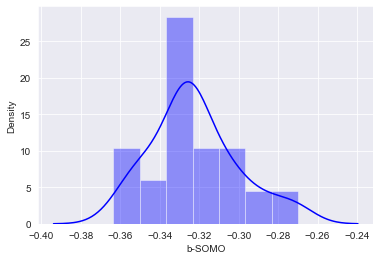

Distribution of  b-SOMO
Mean is: -0.3223772
Median is: -0.32520000000000004
Mode is: 0   -0.32615
1   -0.32557
dtype: float64
Standard deviation is: 0.022068871885207782
Skewness is: 0.5424662478640734
Maximum is: -0.26981
Minimum is: -0.36359


c:\python39\lib\site-packages\seaborn-0.11.1-py3.9.egg\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


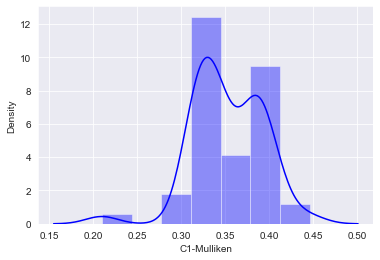

Distribution of  C1-Mulliken
Mean is: 0.35264192
Median is: 0.346
Mode is: 0    0.388
dtype: float64
Standard deviation is: 0.039856854540605946
Skewness is: -0.5263561255668973
Maximum is: 0.446028
Minimum is: 0.209498


c:\python39\lib\site-packages\seaborn-0.11.1-py3.9.egg\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


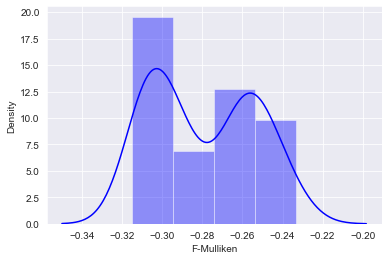

Distribution of  F-Mulliken
Mean is: -0.27952412
Median is: -0.288
Mode is: 0   -0.306
dtype: float64
Standard deviation is: 0.025497512192080744
Skewness is: 0.18471992743025048
Maximum is: -0.233227
Minimum is: -0.315


c:\python39\lib\site-packages\seaborn-0.11.1-py3.9.egg\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


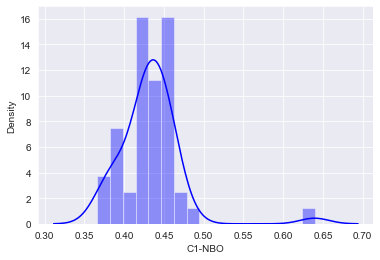

Distribution of  C1-NBO
Mean is: 0.4326192000000001
Median is: 0.431925
Mode is: 0    0.421
1    0.422
2    0.427
dtype: float64
Standard deviation is: 0.03990044196164616
Skewness is: 2.6438088338740697
Maximum is: 0.63947
Minimum is: 0.366


c:\python39\lib\site-packages\seaborn-0.11.1-py3.9.egg\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


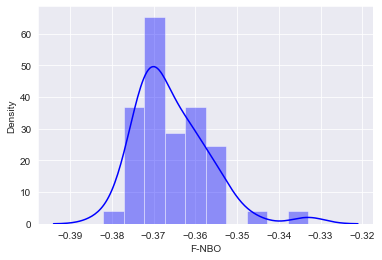

Distribution of  F-NBO
Mean is: -0.36571
Median is: -0.36802
Mode is: 0   -0.371
dtype: float64
Standard deviation is: 0.008701550647641455
Skewness is: 1.2682499941858525
Maximum is: -0.333
Minimum is: -0.382


In [15]:
mydata = df.copy()
cols = list(mydata)
for i in np.arange(len(cols)):
    sns.distplot(mydata[cols[i]], color='blue')
    #plt.xlabel('Experience')
    plt.savefig('distribution{}.svg'.format(i))
    plt.show()
    print('Distribution of ',cols[i])
    print('Mean is:',mydata[cols[i]].mean())
    print('Median is:',mydata[cols[i]].median())
    print('Mode is:',mydata[cols[i]].mode())
    print('Standard deviation is:',mydata[cols[i]].std())
    print('Skewness is:',mydata[cols[i]].skew())
    print('Maximum is:',mydata[cols[i]].max())
    print('Minimum is:',mydata[cols[i]].min())

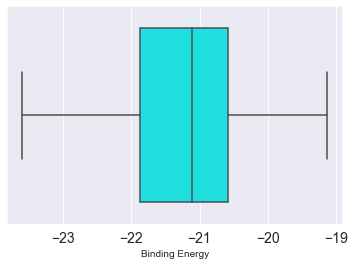

Boxplot of  Binding Energy
Q1 is :  -21.87107666247988
Q2 is :  -21.11685984328005
Q3 is :  -20.578406062524344
IQR is: 1.2926705999555352
Lower Whisker, Upper Whisker :  -23.810082562413182 , -18.63940016259104
Out of  50  rows in data, number of outliers are: 0


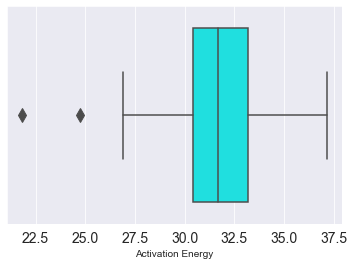

Boxplot of  Activation Energy
Q1 is :  30.427197476491024
Q2 is :  31.66938176001848
Q3 is :  33.178841375543826
IQR is: 2.7516438990528016
Lower Whisker, Upper Whisker :  26.29973162791182 , 37.30630722412303
Out of  50  rows in data, number of outliers are: 2


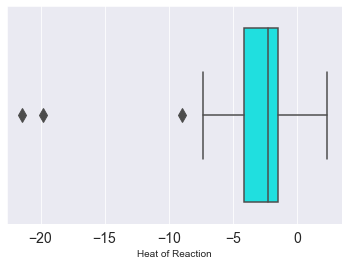

Boxplot of  Heat of Reaction
Q1 is :  -4.117908873000047
Q2 is :  -2.283508889977535
Q3 is :  -1.45902036305857
IQR is: 2.658888509941477
Lower Whisker, Upper Whisker :  -8.106241637912262 , 2.529312401853646
Out of  50  rows in data, number of outliers are: 3


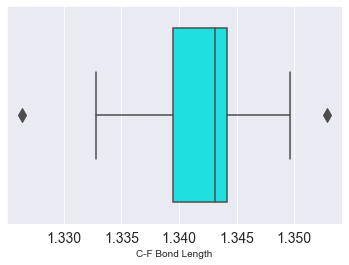

Boxplot of  C-F Bond Length
Q1 is :  1.3394825
Q2 is :  1.34316
Q3 is :  1.3441625
IQR is: 0.0046800000000000175
Lower Whisker, Upper Whisker :  1.3324624999999999 , 1.3511825
Out of  50  rows in data, number of outliers are: 2


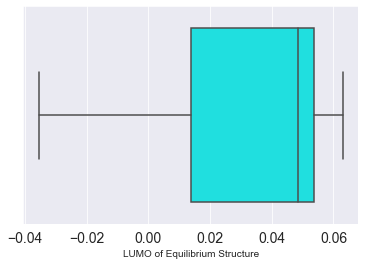

Boxplot of  LUMO of Equilibrium Structure
Q1 is :  0.0138275
Q2 is :  0.04838
Q3 is :  0.053715
IQR is: 0.0398875
Lower Whisker, Upper Whisker :  -0.04600375 , 0.11354625
Out of  50  rows in data, number of outliers are: 0


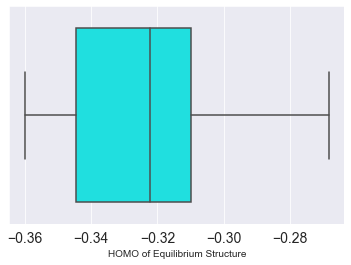

Boxplot of  HOMO of Equilibrium Structure
Q1 is :  -0.344705
Q2 is :  -0.32233999999999996
Q3 is :  -0.30993750000000003
IQR is: 0.03476749999999995
Lower Whisker, Upper Whisker :  -0.3968562499999999 , -0.2577862500000001
Out of  50  rows in data, number of outliers are: 0


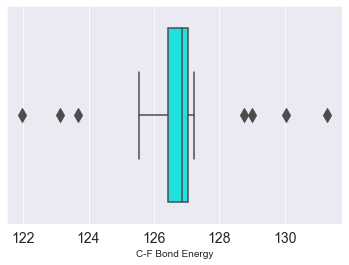

Boxplot of  C-F Bond Energy
Q1 is :  126.430117075
Q2 is :  126.8505032999795
Q3 is :  127.03121993249269
IQR is: 0.6011028574926911
Lower Whisker, Upper Whisker :  125.52846278876096 , 127.93287421873173
Out of  50  rows in data, number of outliers are: 7


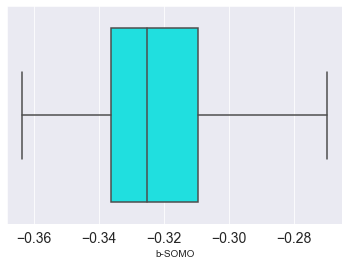

Boxplot of  b-SOMO
Q1 is :  -0.336285
Q2 is :  -0.32520000000000004
Q3 is :  -0.30945
IQR is: 0.026834999999999998
Lower Whisker, Upper Whisker :  -0.37653749999999997 , -0.2691975
Out of  50  rows in data, number of outliers are: 0


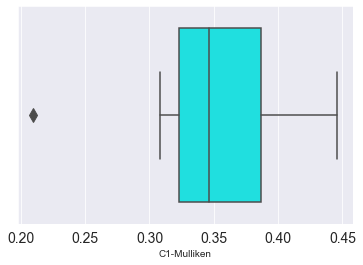

Boxplot of  C1-Mulliken
Q1 is :  0.32318775
Q2 is :  0.346
Q3 is :  0.3865
IQR is: 0.06331225000000001
Lower Whisker, Upper Whisker :  0.22821937499999997 , 0.48146837500000006
Out of  50  rows in data, number of outliers are: 1


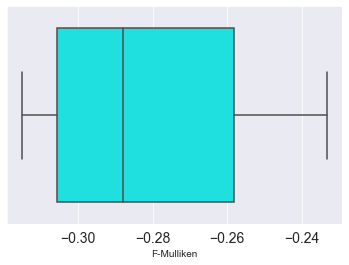

Boxplot of  F-Mulliken
Q1 is :  -0.30574999999999997
Q2 is :  -0.288
Q3 is :  -0.2581355
IQR is: 0.04761449999999995
Lower Whisker, Upper Whisker :  -0.3771717499999999 , -0.1867137500000001
Out of  50  rows in data, number of outliers are: 0


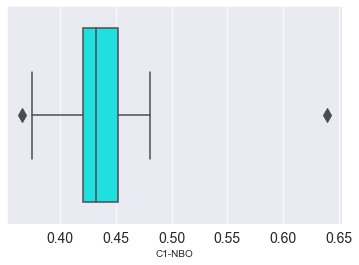

Boxplot of  C1-NBO
Q1 is :  0.42025
Q2 is :  0.431925
Q3 is :  0.4516325
IQR is: 0.03138249999999998
Lower Whisker, Upper Whisker :  0.37317625000000004 , 0.49870624999999996
Out of  50  rows in data, number of outliers are: 2


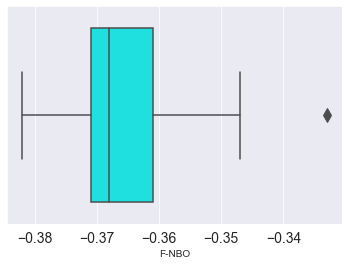

Boxplot of  F-NBO
Q1 is :  -0.371
Q2 is :  -0.36802
Q3 is :  -0.361
IQR is: 0.010000000000000009
Lower Whisker, Upper Whisker :  -0.386 , -0.346
Out of  50  rows in data, number of outliers are: 1


In [14]:
# Checking the presence of outliers
mydata = df.copy()
l = len(mydata)
col = list(mydata.columns)
#col.remove('condition')
for i in np.arange(len(col)):
    sns.boxplot(x= mydata[col[i]], color='cyan',fliersize=10)
    plt.tick_params(labelsize = 14)

    plt.savefig("boxplot{}.svg".format(i))
    plt.show()
    print('Boxplot of ',col[i])
    #calculating the outiers in attribute
    Q1 = mydata[col[i]].quantile(0.25)
    Q2 = mydata[col[i]].quantile(0.50)
    Q3 = mydata[col[i]].quantile(0.75)
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 *IQR)
    U_W = (Q3 + 1.5 *IQR)
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
    bools = (mydata[col[i]] < (Q1 - 1.5 *IQR)) |(mydata[col[i]] > (Q3 + 1.5 * IQR))
    print('Out of ',l,' rows in data, number of outliers are:',bools.sum())

In [16]:
df1 = pd.read_excel("BEAEQ.xlsx")
df1

,Unnamed: 0,p-BE,m-BE,o-BE,p-AE,m-AE,o-AE,p-Q,m-Q,o-Q
0,F,-20.110000,-19.973298,-20.350000,32.190000,30.856424,30.240000,-4.0400,-3.840738,-8.960000
1,COH,-21.080000,-21.639450,-21.770000,32.780000,32.328525,28.170000,-1.9100,-2.192106,-4.810000
2,COMe,-21.190000,-21.433345,-19.140000,32.560000,32.389707,24.720000,-1.8700,-2.033302,-19.800000
3,CN,-21.710000,-21.425701,-21.900000,29.180000,30.992060,27.400000,-2.9600,-3.474372,-6.690000
4,CF3,-21.400000,-20.906908,-21.300000,30.170000,30.593679,29.290000,-2.9000,-3.608170,-6.570000
5,NO2,-22.730000,-21.950990,-22.410000,29.060000,30.745856,21.840000,-2.3100,-3.422753,-21.410000
6,Me,-20.840000,-20.898675,-20.440000,33.340000,33.165221,31.430000,-2.0300,-1.255811,-2.030000
7,iPr,-21.790000,-21.903751,-20.550000,33.990000,33.624678,31.050000,-1.1000,-0.719365,-3.440000
8,OH,-20.740000,-21.154090,-20.180000,34.210000,33.200820,31.690000,-2.9200,-1.495626,-7.150000
9,OMe,-21.930000,-21.952458,-20.110000,35.290000,34.097488,31.020000,-1.5700,-0.711050,-7.320000


In [17]:
df1 = df1.set_index("Unnamed: 0")
df1.index_name = "function_groups"
df1.index.name = "function groups/opm"

In [19]:
df1

,p-BE,m-BE,o-BE,p-AE,m-AE,o-AE,p-Q,m-Q,o-Q
function groups/opm,,,,,,,,,
F,-20.110000,-19.973298,-20.350000,32.190000,30.856424,30.240000,-4.0400,-3.840738,-8.960000
COH,-21.080000,-21.639450,-21.770000,32.780000,32.328525,28.170000,-1.9100,-2.192106,-4.810000
COMe,-21.190000,-21.433345,-19.140000,32.560000,32.389707,24.720000,-1.8700,-2.033302,-19.800000
CN,-21.710000,-21.425701,-21.900000,29.180000,30.992060,27.400000,-2.9600,-3.474372,-6.690000
CF3,-21.400000,-20.906908,-21.300000,30.170000,30.593679,29.290000,-2.9000,-3.608170,-6.570000
NO2,-22.730000,-21.950990,-22.410000,29.060000,30.745856,21.840000,-2.3100,-3.422753,-21.410000
Me,-20.840000,-20.898675,-20.440000,33.340000,33.165221,31.430000,-2.0300,-1.255811,-2.030000
iPr,-21.790000,-21.903751,-20.550000,33.990000,33.624678,31.050000,-1.1000,-0.719365,-3.440000
OH,-20.740000,-21.154090,-20.180000,34.210000,33.200820,31.690000,-2.9200,-1.495626,-7.150000


<AxesSubplot:xlabel='function groups/opm'>

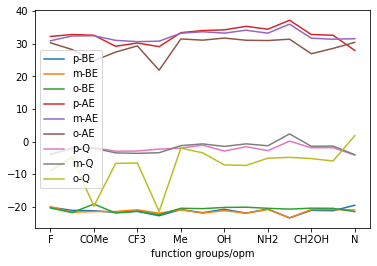

In [20]:
df1.plot()

In [21]:
df_AE = pd.read_excel("AE.xlsx")
df_AE = df_AE.set_index("Unnamed: 0")
df_AE.index_name = "function_groups"
df_AE.index.name = "function groups/opm"
df_BE = pd.read_excel("BE.xlsx")
df_BE = df_BE.set_index("Unnamed: 0")
df_BE.index_name = "function_groups"
df_BE.index.name = "function groups/opm"
df_Q = pd.read_excel("Q.xlsx")
df_Q = df_Q.set_index("Unnamed: 0")
df_Q.index_name = "function_groups"
df_Q.index.name = "function groups/opm"

In [35]:
# plt.xticks(['F', 'COH', 'COMe', 'CN', 'CF3', 'NO2', 'Me', 'iPr', 'OH', 'OMe', 'NH2',
#        'NMe2', 'CH2OH', 'CH2OMe', 'N'])
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
fig = plt.figure(1)
ax_cof = HostAxes(fig, ['F', 'COH', 'COMe', 'CN', 'CF3', 'NO2', 'Me', 'iPr', 'OH', 'OMe', 'NH2','NMe2', 'CH2OH', 'CH2OMe', 'N'])
ax_AE = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_BE = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_Q = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_cof.parasites.append(ax_AE)
ax_cof.parasites.append(ax_BE)
ax_cof.parasites.append(ax_Q)
plt.show()

TypeError: from_bounds() takes 4 positional arguments but 15 were given

<Figure size 432x288 with 0 Axes>

In [47]:
x = ['F', 'COH', 'COMe', 'CN', 'CF3', 'NO2', 'Me', 'iPr', 'OH', 'OMe', 'NH2','NMe2', 'CH2OH', 'CH2OMe', 'N']
p = df_AE['p-AE'].values
o = df_AE['o-AE'].values
m = df_AE['m-AE'].values


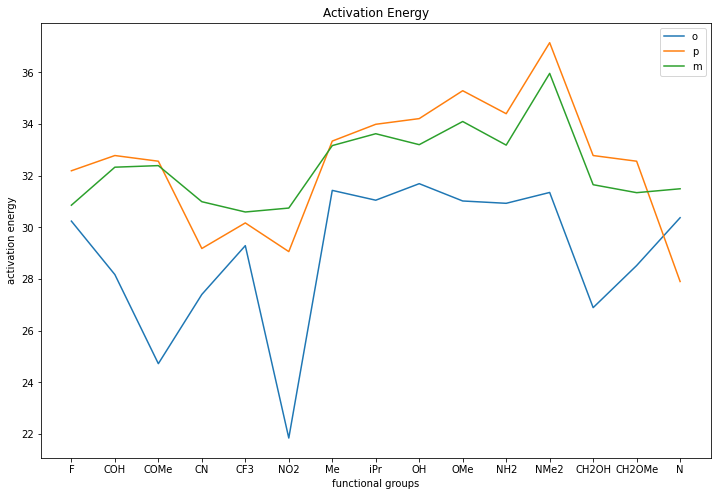

In [53]:
plt.figure(figsize=(12, 8))
plt.plot(x, o, label = "o")
plt.plot(x, p, label = "p")
plt.plot(x, m, label = "m")
plt.title("Activation Energy")
plt.xlabel("functional groups")
plt.ylabel("activation energy")
plt.legend()
plt.savefig("AE.png")
plt.show()

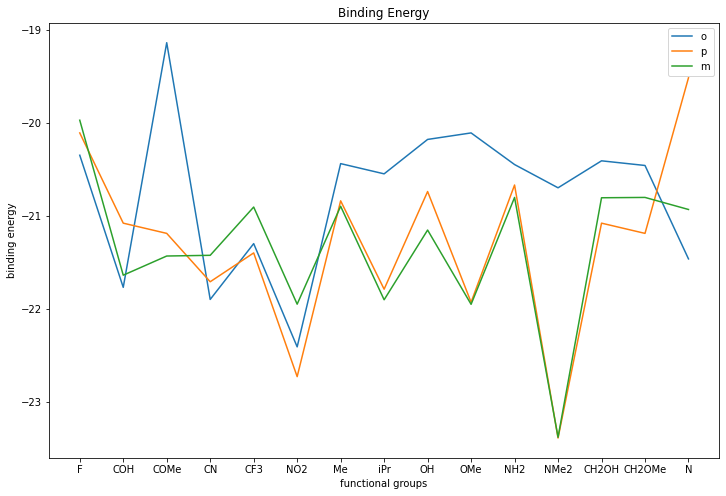

In [54]:
x = ['F', 'COH', 'COMe', 'CN', 'CF3', 'NO2', 'Me', 'iPr', 'OH', 'OMe', 'NH2','NMe2', 'CH2OH', 'CH2OMe', 'N']
p = df_BE['p-BE'].values
o = df_BE['o-BE'].values
m = df_BE['m-BE'].values
plt.figure(figsize=(12, 8))
plt.plot(x, o, label = "o")
plt.plot(x, p, label = "p")
plt.plot(x, m, label = "m")
plt.title("Binding Energy")
plt.xlabel("functional groups")
plt.ylabel("binding energy")
plt.legend()
plt.savefig("BE.png")
plt.show()

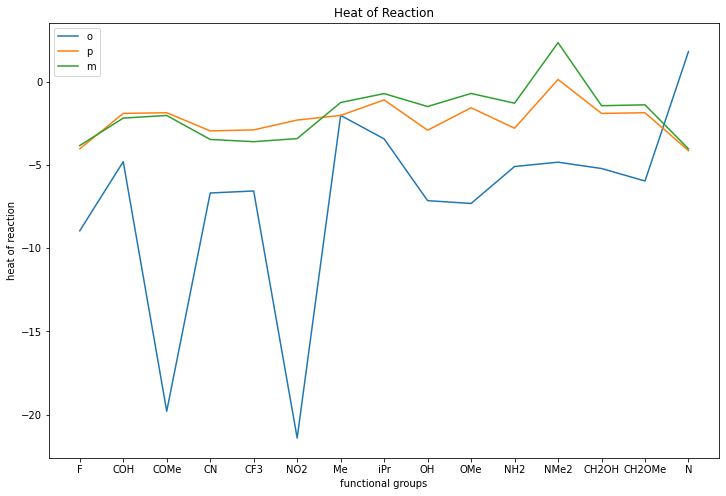

In [55]:
x = ['F', 'COH', 'COMe', 'CN', 'CF3', 'NO2', 'Me', 'iPr', 'OH', 'OMe', 'NH2','NMe2', 'CH2OH', 'CH2OMe', 'N']
p = df_Q['p-Q'].values
o = df_Q['o-Q'].values
m = df_Q['m-Q'].values
plt.figure(figsize=(12, 8))
plt.plot(x, o, label = "o")
plt.plot(x, p, label = "p")
plt.plot(x, m, label = "m")
plt.title("Heat of Reaction")
plt.xlabel("functional groups")
plt.ylabel("heat of reaction")
plt.legend()
plt.savefig("Q.png")
plt.show()

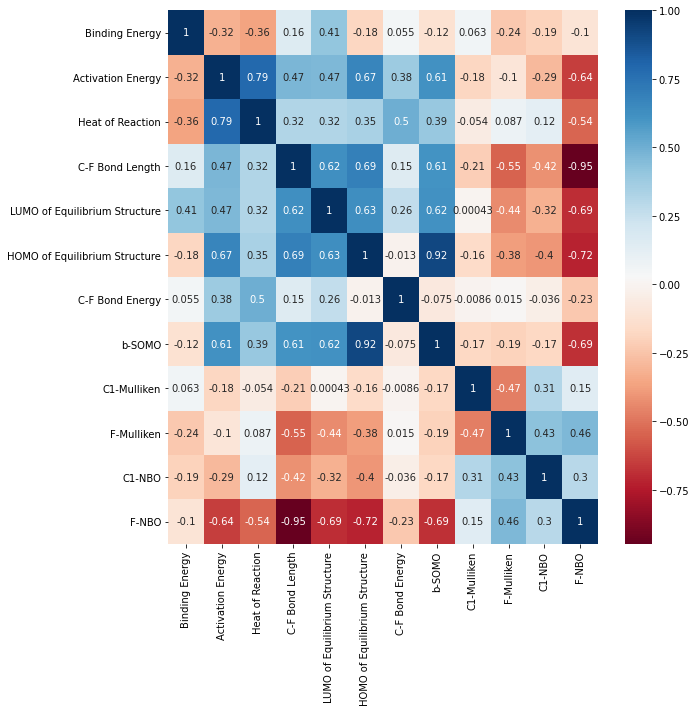

In [66]:
b_corr=mydata.corr()
plt.subplots(figsize =(10, 10))
fig = sns.heatmap(b_corr,cmap = "RdBu",annot=True)
heatmap = fig.get_figure()
plt.tight_layout()
heatmap.savefig("heatmap.png", dpi = 400)

In [8]:
import os
import PIL.Image  as Image

IMAGES_PATH = r'D:\Programming\algorithm\AI\mlchem\ML methods\distributionplot\\'  # 图片集地址
IMAGES_FORMAT = ['.png', '.PNG']  # 图片格式
IMAGE_SIZE = 400  # 每张小图片的大小
IMAGE_ROW = 3  # 图片间隔，也就是合并成一张图后，一共有几行
IMAGE_COLUMN = 4  # 图片间隔，也就是合并成一张图后，一共有几列
IMAGE_SAVE_PATH = r'D:\Programming\algorithm\AI\mlchem\ML methods\distributionplot\final.jpg'  # 图片转换后的地址

# 获取图片集地址下的所有图片名称
image_names = [name for name in os.listdir(IMAGES_PATH) for item in IMAGES_FORMAT if
               os.path.splitext(name)[1] == item]

print("image_names", image_names)
# 简单的对于参数的设定和实际图片集的大小进行数量判断
if len(image_names) != IMAGE_ROW * IMAGE_COLUMN:
    raise ValueError("合成图片的参数和要求的数量不能匹配！")


# 定义图像拼接函数
def image_compose():
    to_image = Image.new('RGB', (IMAGE_COLUMN * IMAGE_SIZE, IMAGE_ROW * IMAGE_SIZE))  # 创建一个新图
    # 循环遍历，把每张图片按顺序粘贴到对应位置上
    for y in range(1, IMAGE_ROW + 1):
        for x in range(1, IMAGE_COLUMN + 1):
            from_image = Image.open(IMAGES_PATH + image_names[IMAGE_COLUMN * (y - 1) + x - 1]).resize(
                (IMAGE_SIZE, IMAGE_SIZE), Image.ANTIALIAS)
            to_image.paste(from_image, ((x - 1) * IMAGE_SIZE, (y - 1) * IMAGE_SIZE))
    return to_image.save(IMAGE_SAVE_PATH)  # 保存新图


image_compose()  # 调用函数


image_names ['distribution0.png', 'distribution1.png', 'distribution10.png', 'distribution11.png', 'distribution2.png', 'distribution3.png', 'distribution4.png', 'distribution5.png', 'distribution6.png', 'distribution7.png', 'distribution8.png', 'distribution9.png']


In [3]:
import matplotlib.pyplot as plt
from dataprocessing import *
import xgboost
import graphviz
from function import *
from sklearn.model_selection import cross_val_score, cross_validate
import numpy as np
from xgboost import plot_tree
xgb = xgboost.XGBRegressor()
xgb.fit(X_vtrain, y_ActivationEnergy_vtrain)
#cv_results = cross_validate(RFR, X_vtrain, y_Q_vtrain, cv =10, scoring = "mean_sqaured_error")
scores = cross_val_score(xgb, X_vtrain, y_ActivationEnergy_vtrain, cv = 10, scoring="neg_mean_squared_error")
xgb_rmse_scores = np.sqrt(-scores)
y_ActivationEnergy_predict = xgb.predict(X_test)
display_scores(xgb_rmse_scores)
evaluation_indicators(y_ActivationEnergy_test, y_ActivationEnergy_predict)


Scores:  [0.61912778 1.34933101 2.53162266 1.15837349 0.92538007 2.02881877
 1.55441019 0.58321512 1.31653307 2.52983586]
Mean: 1.4596648025415424
Standard deviation:  0.6716275818468022
real value:
 [33.33709626 35.29304493 32.56463145 32.38970676 30.59367902 33.16522127
 31.65013603 31.01907432 28.52221203 34.18473677]
predict value:
 [33.9798   34.203327 32.564632 32.37368  30.890844 32.916355 31.721478
 32.341488 30.219492 33.343357]
mae:
 0.6226896405153305
mse:
 0.7093599000178507
rmse:
 0.8422350622111684
mape:
 0.019687357180931668
r2 score:
 0.7892024824237539


AttributeError: 'XGBRegressor' object has no attribute 'to_graphviz'